<a href="https://colab.research.google.com/github/dakyommii/MinhwaProject/blob/main/minhwa-explanation/train/YOLOv5_Object_Detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv5 Object Detection 학습

## settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/seol
# !git clone https://github.com/ultralytics/yolov5.git

/content/drive/MyDrive/seol


In [ ]:
!pip install -qr /content/drive/MyDrive/seol/yolov5/requirements.txt # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/seol/datasets/YOLOv5

[Errno 2] No such file or directory: '/content/drive/MyDrive/seol/datasets/YOLOv5'
/content/drive/MyDrive/seol


In [88]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob, os
from sklearn.cluster import KMeans
from collections import Counter
import colorsys
import tensorflow as tf

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW, get_linear_schedule_with_warmup, AutoModelWithLMHead, PreTrainedTokenizerFast
from torch.utils.data import Dataset, DataLoader

from fastai.text.all import *
import fastai
import re


## dataset

### roboflow dataset download

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="o8IhKIIZs84VuK9nEwLz")
project = rf.workspace("dalkkommi-gmail-com").project("tiger-minhwa")
dataset = project.version(10).download("yolov5")


### image 경로 설정

In [ ]:
from glob import glob #이미지를 한번에 긁어모으기 위한 glob 모듈

img_list = glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/train/images/*.jpg') # 트레인 이미지 경로
test_img_list = glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/test/images/*.jpg') # 테스트 이미지 경로
val_img_list=glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/valid/images/*.jpg') # validation 이미지 경로

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/train.txt', 'w') as f:
    f.write('\n'.join(img_list) + '\n')

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/valid.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

## train

In [ ]:
!python /content/drive/MyDrive/seol/yolov5/train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-8/data.yaml --name ft --weights yolov5x.pt #--name result_jetbot --cfg ./models/yolov5x.yaml

## detection

In [ ]:
# permission denied error 발생시 권한설정
!chmod +x /content/drive/MyDrive/seol/yolov5/detect.py

In [ ]:
%cd /content/drive/MyDrive/seol/yolov5

/content/drive/MyDrive/seol/yolov5


In [ ]:
!pwd

/content/drive/MyDrive/seol/yolov5


In [ ]:
!python ./detect.py --weights /content/drive/MyDrive/seol/yolov5/runs/train/minhwa-fin/weights/best.pt --img 640 --source /content/drive/MyDrive/seol/test/yolov5/minhwa-v2

detect: weights=['/content/drive/MyDrive/seol/yolov5/runs/train/minhwa-fin/weights/best.pt'], source=/content/drive/MyDrive/seol/test/yolov5/minhwa-v2, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/seol/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
image 1/5 /content/drive/MyDrive/seol/test/yolov5/minhwa-v2/minhwa1.jpeg: 640x384 1 kingfisher, 3 lotuss, 1 pheasant, 49.0ms
image 2/5 /content/drive/MyDrive/seol/test/yolov5/minhwa-v2/minhw

## 민화 객체 및 위치 정보 추출

In [ ]:
# bird set
# bird=['bird','chicken','duck','kingfisher','magpie','mandarin-duck','pheasant']

# # flower set
# flower=['flower','magnolia']

In [31]:
key_lst=[['bird',0], ['branch',0], ['butterfly',0], ['chicken',0], ['duck',0], ['egret',0], ['flower',0], ['grass',0], ['kingfisher',0], ['lotus',0], ['lotus-seed',0], ['magnolia',0], ['magpie',0], ['flying-magpie',0],['mandarin-duck',0], ['moran',0] ,['pheasant',0], ['pheonix',0] ,['rock',0], ['tiger',0],['beige-flower',0],['black-flower',0],['blue-flower',0],['brown-flower',0],['gray-flower',0],['green-flower',0],['mint-flower',0],['pink-flower',0],['plum-flower',0],['purple-flower',0],['white-flower',0],['red-flower',0],['yellow-flower',0],['beige-moran',0],['black-moran',0],['blue-moran',0],['brown-moran',0],['gray-moran',0],['green-moran',0],['mint-moran',0],['pink-moran',0],['plum-moran',0],['purple-moran',0],['white-moran',0],['red-moran',0],['yellow-moran',0],['beige-butterfly',0],['black-butterfly',0],['blue-butterfly',0],['brown-butterfly',0],['gray-butterfly',0],['green-butterfly',0],['mint-butterfly',0],['pink-butterfly',0],['plum-butterfly',0],['purple-butterfly',0],['white-butterfly',0],['red-butterfly',0],['yellow-butterfly',0]]
key_dic=dict(key_lst)

In [32]:
# 객체명, 객체 위치 좌표 저장
loc = []
key_name= []
with open('/content/drive/MyDrive/seol/test/yolov5/algo-test.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    ts=[]
    t=line.strip()
    ts.append(int(t.split()[0][1:-1]))
    ts.append(int(t.split()[1][:-1]))
    ts.append(int(t.split()[2][1:-1]))
    ts.append(int(t.split()[3][:-1]))
    loc.append(tuple(map(int, ts)))

    k=t.split()[4]
    print(k)
    key_name.append(k)
    key_dic[k]+=1


lotus
flower
flower
butterfly
moran
butterfly
moran
moran
moran


### 객체별 중앙 좌표 계산 & 색상 객체 저장

In [33]:
from PIL import Image

# 이미지를 엽니다.
image = Image.open("/content/drive/MyDrive/seol/test/yolov5/minhwa-v2/minhwa5.jpeg")

# (x1, y1, x2, y2) 형태의 튜플로 크롭 영역을 지정합니다.
# 여기서 (x1, y1)은 크롭 영역의 왼쪽 상단 좌표이고, (x2, y2)는 오른쪽 하단 좌표입니다.

mid=[]
for i in range(0,len(loc)):

  # 꽃, 나비, 모란 객체만 색상 판별을 위해 이미지 별도 저장
  if(key_name[i]!= 'flower' and key_name[i]!= 'butterfly' and key_name[i]!= 'moran'): continue

  crop_area = loc[i]

  # 이미지를 크롭합니다.
  cropped_image = image.crop(crop_area)

  width, height = cropped_image.size

  # 중앙 영역의 크기를 정합니다. (여기서는 이미지의 1/2로 설정)
  crop_width = width // 2
  crop_height = height // 2

  # 중앙 영역의 좌표를 계산합니다.
  x1 = (width - crop_width) // 2
  y1 = (height - crop_height) // 2
  x2 = x1 + crop_width
  y2 = y1 + crop_height

  mid.append([(x1+x2)/2,(y1+y2)/2])

  # (x1, y1, x2, y2) 형태의 튜플로 크롭 영역을 지정합니다.
  cropped_area = (x1, y1, x2, y2)

  # 이미지를 크롭합니다.
  fin_img = cropped_image.crop(cropped_area)

  # 크롭한 이미지를 저장합니다.
  fin_img.save("/content/drive/MyDrive/seol/test/color-test/minhwa-v2/"+key_name[i]+"-%d.jpg"%i)

## K-Means Clustering 색상 정보 추출

In [12]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_):
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [13]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


In [14]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)

    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))

    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    # print(k_cluster.cluster_centers_[0][0])
    # color=np.unit8([[k_cluster.cluster_centers_[0]]])
    # main_color=k_cluster.cluster_centers_[0]

    step = 0

    for idx, centers in enumerate(k_cluster.cluster_centers_):
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)

    return palette


In [15]:
import colorsys
import numpy as np
import tensorflow as tf

def rgb_to_hsv(r, g, b):
    r /= 255.0
    g /= 255.0
    b /= 255.0
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    h *= 360.0  # HSV의 색상 값은 0~360 사이의 값으로 표현됩니다.
    return h, s, v

In [17]:
def color_detect(obj_minhwa):
  clt=KMeans(n_clusters=5)
  clt_1 = clt.fit(obj_minhwa.reshape(-1, 3))

  width = 300
  palette = np.zeros((50, width, 3), np.uint8)

  n_pixels = len(clt_1.labels_)
  counter = Counter(clt_1.labels_) # count how many pixels per cluster
  perc = {}
  for i in counter:
      perc[i] = np.round(counter[i]/n_pixels, 2)
  perc = dict(sorted(perc.items(),reverse=True))

  #for logging purposes
  # print(perc)
  # print(clt_1.cluster_centers_)

  step = 0

  for idx, centers in enumerate(clt_1.cluster_centers_):
      palette[:, step:int(step + perc[idx]*width+1), :] = centers
      step += int(perc[idx]*width+1)

  # 높은 빈도 색상 찾기
  perc = dict(sorted(perc.items(),key = lambda item: item[1],reverse=True))
  idx = list(perc.keys())[0]

  # perc = dict(sorted(perc.items()))
  # perc
  r=clt_1.cluster_centers_[int(idx)][0]
  g=clt_1.cluster_centers_[int(idx)][1]
  b=clt_1.cluster_centers_[int(idx)][2]

  # print('%d,%d,%d\n'%(r,g,b))
  # rgb='%d,%d,%d\n'%(r,g,b)

  # rgb_lst=[r,g,b]

  # hsv_lst.append(rgb_lst)

  h, s, v = rgb_to_hsv(r, g, b)

  # orange -> brown 으로 인식. brown 수정
  sample_hue = round(h,2) # 예시로 Hue 값을 180으로 설정
  sample_saturation = round(s,2)
  sample_value = round(v,2)

  loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/seol/ckpt/color_regression_fin.h5')
  sample_hsv = np.array([[sample_hue, sample_saturation, sample_value]], dtype=np.float32)
  predicted_color_probs = loaded_model.predict(sample_hsv)
  predicted_color_label = np.argmax(predicted_color_probs)

  print(f"Predicted color for HSV ({sample_hue}, {sample_saturation}, {sample_value}): {predicted_color_label}")
  return predicted_color_label
  # rgb_color = hsv_to_rgb(sample_hue, sample_saturation, sample_value)

  # plt.imshow([[(rgb_color[0]/255, rgb_color[1]/255, rgb_color[2]/255)]])
  # plt.title(f"Hue={sample_hue}, Saturation={sample_saturation}, Value={sample_value}")
  # plt.axis('off')


In [35]:
color_dic = {0:'beige', 1:'black', 2:'blue', 3:'brown', 4:'gray', 5:'green', 6:'mint', 7:'pink', 8:'plum', 9:'purple', 10:'red', 11:'white', 12:'yellow'}

### 객체 색상 분류

In [36]:
for i in range(0,len(key_name)):
  obj=key_name[i]
  if(obj=='flower' or obj=='moran' or obj=='butterfly'):
    print(obj)
    print(i)
    path='/content/drive/MyDrive/seol/test/color-test/minhwa-v2/'+obj+'-%d.jpg'%i
    obj_minhwa=cv2.imread(path)
    # print(obj[i])
    obj_minhwa=cv2.cvtColor(obj_minhwa,cv2.COLOR_BGR2RGB)

    res=color_detect(obj_minhwa)
    # print(color_dic[res])
    c=color_dic[res]

    if(obj=='flower'):
      key_dic['flower']-=1
      k=c+'-flower'
      key_name[i]=k
      key_dic[k]+=1
    elif(obj=='moran'):
      key_dic['moran']-=1
      k=c+'-moran'
      key_name[i]=k
      key_dic[k]+=1
    else:
      key_dic['butterfly']-=1
      k=c+'-butterfly'
      key_name[i]=k
      key_dic[k]+=1


flower
1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
Predicted color for HSV (28.18, 0.13, 0.96): 11
flower
2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
Predicted color for HSV (21.0, 0.89, 0.93): 12
butterfly
3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
Predicted color for HSV (30.95, 0.17, 0.88): 0
moran
4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
Predicted color for HSV (9.07, 0.09, 0.9): 11
butterfly
5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
Predicted color for HSV (50.45, 0.08, 0.84): 4
moran
6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
Predicted color for HSV (19.53, 0.97, 0.89): 12
moran
7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
Predicted color for HSV (25.73, 0.27, 0.97): 12
moran
8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
Predicted color for HSV (12.72, 0.09, 0.9): 11


### 색상 스펙트럼 테스트

{4: 0.31, 3: 0.17, 2: 0.2, 1: 0.03, 0: 0.29}
[[240.47356322 105.61724138  23.93793103]
 [230.21518987 202.40506329 176.43037975]
 [250.03577513 130.21465077  47.49403748]
 [198.86372745  64.3507014    1.73947896]
 [226.27540984  78.8852459    7.75956284]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


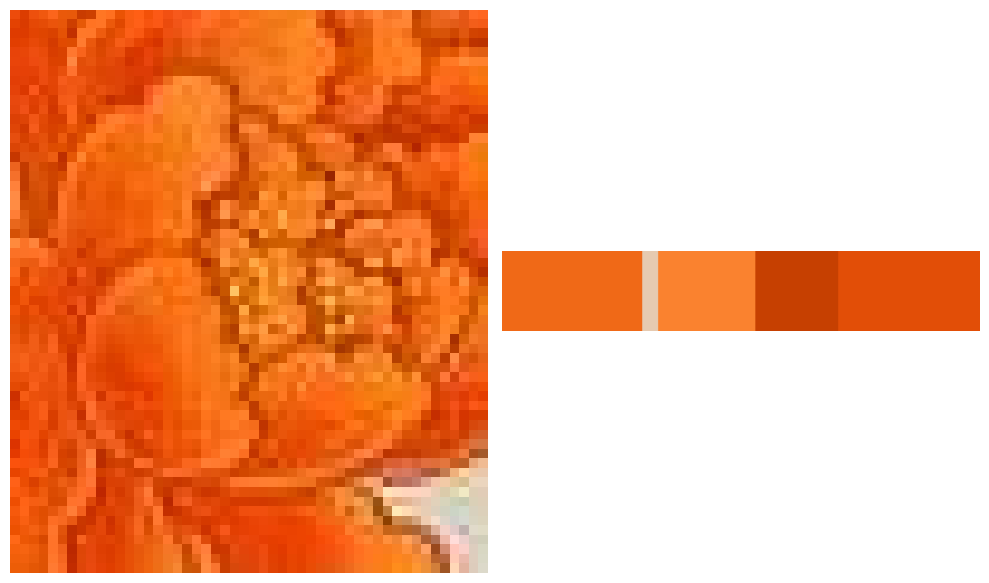

In [37]:
# 색상 스펙트럼 테스트
obj_minhwa=cv2.imread('/content/drive/MyDrive/seol/test/color-test/minhwa-v2/moran-6.jpg')
obj_minhwa=cv2.cvtColor(obj_minhwa,cv2.COLOR_BGR2RGB)

from sklearn.cluster import KMeans
from collections import Counter

clt=KMeans(n_clusters=5)
clt_1 = clt.fit(obj_minhwa.reshape(-1, 3))

width = 300
palette = np.zeros((50, width, 3), np.uint8)

n_pixels = len(clt_1.labels_)
counter = Counter(clt_1.labels_) # count how many pixels per cluster
perc = {}
for i in counter:
    perc[i] = np.round(counter[i]/n_pixels, 2)
perc = dict(sorted(perc.items(),reverse=True))

#for logging purposes
print(perc)
print(clt_1.cluster_centers_)

step = 0

for idx, centers in enumerate(clt_1.cluster_centers_):
    palette[:, step:int(step + perc[idx]*width+1), :] = centers
    step += int(perc[idx]*width+1)

show_img_compar(obj_minhwa, palette)


## 민화 장르 분류 & 객체 문장 생성

In [38]:
# 민화 장르 분류
en2ko=[['bird','새가'], ['branch','나뭇가지가'], ['butterfly','나비가'], ['chicken','닭이'], ['duck','오리가'], ['egret','학이'], ['flower','꽃이'], ['grass','풀이'], ['kingfisher','물총새가'], ['lotus','연꽃이'], ['lotus-seed','연밥이'], ['magnolia','목련이'], ['magpie','까치가'],['mandarin-duck','청둥오리가'], ['moran','모란이'] ,['pheasant','꿩이'], ['pheonix','봉황이'] ,['rock','암석이'], ['tiger','호랑이가'],['beige-flower','베이지색 꽃이'],['black-flower','검은 꽃이'],['blue-flower','파란 꽃이'],['brown-flower','갈색 꽃이'],['gray-flower','회색 꽃이'],['green-flower','초록색 꽃이'],['mint-flower','민트색 꽃이'],['pink-flower','분홍색 꽃이'],['plum-flower','자주색 꽃이'],['purple-flower','보라색 꽃이'],['white-flower','흰 꽃이'],['red-flower','붉은 꽃이'],['yellow-flower','노란 꽃이'],['beige-moran','베이지색 모란이'],['black-moran','검은 모란이'],['blue-moran','파란 모란이'],['brown-moran','갈색 모란이'],['gray-moran','회색 모란이'],['green-moran','초록색 모란이'],['mint-moran','민트색 모란이'],['pink-moran','분홍색 모란이'],['plum-moran','자주색 모란이'],['purple-moran','보라색 모란이'],['white-moran','흰 모란이'],['red-moran','빨간 모란이'],['yellow-moran','노란 모란이'],['beige-butterfly','베이지색 나비가'],['black-butterfly','검은 나비가'],['blue-butterfly','파란 나비가'],['brown-butterfly','갈색 나비가'],['gray-butterfly','회색 나비가'],['green-butterfly','초록색 나비가'],['mint-butterfly','민트색 나비가'],['pink-butterfly','분홍색 나비가'],['plum-butterfly','자주색 나비가'],['purple-butterfly','보라색 나비가'],['white-butterfly','흰색 나비가'],['red-butterfly','빨간 나비가'],['yellow-butterfly','노란 나비가']]
en2ko_dic=dict(en2ko)

In [39]:
# bird set
# bird=['bird','chicken','duck','kingfisher','magpie','mandarin-duck','pheasant']

# flower set
flower_set=['flower','magnolia','lotus','moran','lotus-seed']

#anim set
obj_set=['branch','grass','lotus','moran','rock']

In [40]:
stc=[]
for key, value in key_dic.items():
  if(value==1): print(en2ko_dic[key]+ " 있는 민화입니다.")
  elif(value>1):
    flower_sub = any(s in key for s in flower_set)
    obj_sub=any(s in key for s in obj_set)
    if(flower_sub): print("%d 송이의 "%value+en2ko_dic[key]+ " 있는 민화입니다.")
    elif(obj_sub): print("%d 개의 "%value+en2ko_dic[key]+ " 있는 민화입니다.")
    else: print("%d 마리의 "%value+en2ko_dic[key]+ " 있는 민화입니다.")

연꽃이 있는 민화입니다.
흰 꽃이 있는 민화입니다.
노란 꽃이 있는 민화입니다.
2 송이의 흰 모란이 있는 민화입니다.
2 송이의 노란 모란이 있는 민화입니다.
베이지색 나비가 있는 민화입니다.
회색 나비가 있는 민화입니다.


In [41]:
# 민화 장르 분류
gen=''

# 모란 개수
cnt = sum(s.count('moran') for s in key_name)
# print(cnt)

if(key_dic['tiger']>0):
  print('이 민화는 호작도입니다.')
  gen='호작도'
elif(key_dic['egret']>0):
  print('이 민화는 송학도입니다.')
  gen='송학도'
elif(key_dic['pheonix']>0):
  print('이 민화는 봉황도입니다.')
  gen='봉황도'
elif(key_dic['lotus']>0):
  # 모란 없음
  if(cnt==0 or cnt<key_dic['lotus']):
    print('이 민화는 연화도입니다.')
    gen='연화도'
  # 모란 있음 -> 개수 비교
  else:
    print('이 민화는 모란도입니다.')
    gen='모란도'
elif(cnt>0):
    print('이 민화는 모란도입니다.')
    gen='모란도'
else:
  print('이 민화는 화조도입니다.')
  gen='화조도'

이 민화는 모란도입니다.


## koGPT2 설명문 생성을 위한 프롬포트 구성

In [42]:
# 키워드 추출
key_prompt=''
for i in range(0,len(key_name)):
  key_prompt+=en2ko_dic[key_name[i]][:-1]+', '
key_str=key_prompt[:-2]
key_str

'연꽃, 흰 꽃, 노란 꽃, 베이지색 나비, 흰 모란, 회색 나비, 노란 모란, 노란 모란, 흰 모란'

## KoGPT 설명문 생성

In [91]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("/content/drive/MyDrive/seol/ckpt/kogpt2-fin",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') # 토크나이저

model = AutoModelWithLMHead.from_pretrained("/content/drive/MyDrive/seol/ckpt/kogpt2-fin")  # 모델 불러오기

# prompt = "tiger,red flower" ## 입력 텍스트
input_ids = tokenizer.encode(key_str, return_tensors="pt")

# 텍스트 생성
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95)

# 생성된 텍스트 출력
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1509: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


연꽃, 흰 꽃, 노란 꽃, 베이지색 나비, 흰 모란, 회색 나비, 노란 모란, 노란 모란, 흰 모란 | 이 민화는 모란도입니다. 갈색 모란 아래에 바위가 있는 모란도에는입니다. 연꽃 아래에 노란색 모란이 있는 연화도입니다.”노란 꽃 위에 갈색 모 있는 화조도입니다. 흰색 모란 위에 연꽃이 있는 호 갈색 화 꽃 아래에 연꽃 있는 민도였다. 연꽃 위에 노란 꽃이 있는 봉황이 있는 꽃도합니다. 물총새 아래에 노란가지가 있는다까치 위에 나비가


### 후처리

In [96]:
def remove_after_char(s, char):
    # 문자열을 특정 문자 기준으로 분할
    parts = s.split(char)
    # 첫 번째 부분만 반환
    return parts[0]

In [100]:
val=generated_text
val_new = remove_after_char(val, '”')
generated_text=val_new

In [93]:
val=generated_text
val_new = val.replace('모란도에는입니다', '모란도입니다') # 바꿀 텍스트와 대체할 텍스트
generated_text=val_new

generated_text

'연꽃, 흰 꽃, 노란 꽃, 베이지색 나비, 흰 모란, 회색 나비, 노란 모란, 노란 모란, 흰 모란 | 이 민화는 모란도입니다. 갈색 모란 아래에 바위가 있는 모란도입니다. 연꽃 아래에 노란색 모란이 있는 연화도입니다.”노란 꽃 위에 갈색 모 있는 화조도입니다. 흰색 모란 위에 연꽃이 있는 호 갈색 화 꽃 아래에 연꽃 있는 민도였다. 연꽃 위에 노란 꽃이 있는 봉황이 있는 꽃도합니다. 물총새 아래에 노란가지가 있는다까치 위에 나비가'

### koGPT2 train을 위한 csv 생성

In [80]:
exp=[]  # 전체 설명 문자열 list
combo_lst=[]
genre_list=[]

In [81]:
stc=[]
for i in range(0,len(mid)):
  cur=en2ko_dic[key_name[i]]

  for j in range(0,len(mid)):
    if(i==j): continue

    cp=en2ko_dic[key_name[j]]

    # 같은 객체간 비교 안함
    if(cur==cp): continue

    # 현재 객체가 위에 있음
    s=''
    if(mid[i][1]<mid[j][1]): s=cp[:-1]+" 위에 "+cur+" 있다."
    # 현재 객체가 아래에 있음
    if(mid[i][1]>mid[j][1]): s=cp[:-1]+" 아래에 "+cur+" 있다."
    stc.append(s)

texts=list(set(stc))

In [82]:
key_lst=[]
for i in range(0,len(key_name)):
  # kwd = obj[i].split('-')
  # if(len(kwd)==3):key_lst.append(kwd[0]+' '+kwd[1])
  # else: key_lst.append(kwd[0])
  cur=en2ko_dic[key_name[i]]
  key_lst.append(cur[:-1])

keywords=list(set(key_lst))
keywords

['노란 모란', '베이지색 나비', '회색 나비', '흰 꽃', '노란 꽃', '연꽃', '흰 모란']

In [83]:
from itertools import combinations

# keywords = ['white flower', 'red flower', 'yellow flower', 'lotus', 'rock', 'bird', 'brown moran', 'white moran']
# genre='Morando'

# 가능한 모든 조합 생성
all_combinations = []
for r in range(1, len(keywords) + 1):  # 1개부터 모든 키워드를 사용한 조합까지 생성
    combinations_r = combinations(keywords, r)
    all_combinations.extend(combinations_r)

# 생성된 조합 출력
combos=[]
for combo in all_combinations:
  s=""
  for i in range(0,len(combo)):
    if(s!=""): s+=','
    s+=combo[i]

  combos.append(s)

unique_combo = list(set(combos))

for i in range(0,len(unique_combo)):
  combo_lst.append(unique_combo[i])

# genre_list += [gen] * len(unique_combo)


In [84]:
# exp=[]  # 전체 설명 문자열 list
for i in range(0,len(unique_combo)):
  key = unique_combo[i].split(',')
  s="이 민화는 "+gen+'이다.'
  for j in range(0,len(key)):
    word_to_check = key[j]  # 확인하고자 하는 단어
    for k in range(0,len(texts)):
      if word_to_check in texts[k]:
        s+=' '
        s+=texts[k]

  exp.append(s)

In [86]:
import pandas as pd
# 데이터를 담을 딕셔너리 생성
data = {
    'keyword': combo_lst,
    'explanation': exp
}

# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터프레임을 CSV 파일로 저장
csv_file_path = "/content/drive/MyDrive/seol/datasets/sample_data.csv"  # 저장할 CSV 파일의 경로 및 파일명 지정
df.to_csv(csv_file_path, index=False)  # index=False로 설정하면 인덱스를 CSV에 저장하지 않습니다.
